In [31]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [32]:
with open('positive.dat','r') as f:
    positive = f.readlines()
with open('negative.dat','r') as f:
    negative = f.readlines()

In [33]:
def process_data(a,b):
    returnvalue1=[]
    for point in a:
        point=point[2:]
        point =[ x.split(':')[-1] for x in point.split(' ')[:-1]]
        returnvalue1.append(point)
    returnvalue2=[]
    for point in b:
        point=point[3:]
        point =[ x.split(':')[-1] for x in point.split(' ')[:-1]]
        returnvalue2.append(point)
    return np.float64(returnvalue1),np.float64(returnvalue2)

In [34]:
positive ,negative= process_data(positive,negative)


In [35]:
n=4000
trainpos=positive[:n];testpos=positive[n:]
trainneg=negative[:n];testneg=negative[n:]
labels=np.zeros([n]);ones=np.ones([n]);trainlabels = np.concatenate((labels,ones))
testlabels=np.zeros([5000-n]);testones=np.ones([5000-n]);testlabels = np.concatenate((testlabels,testones))
datapoints=np.concatenate((trainneg,trainpos))
testcases=np.concatenate((testneg,testpos))

In [36]:
len(datapoints)

8000

In [37]:
kernals=['poly', 'rbf']
for kernal in kernals:
    clf = svm.SVC(kernel=kernal)
    clf.fit(datapoints, trainlabels)  
    print "kernal: " ,kernal," score: ",clf.score(testcases,testlabels)

kernal:  poly  score:  0.7915
kernal:  rbf  score:  0.4995


In [38]:
gamma_range = np.array([1,0.1,0.01,0.001,0.0001,0.00001,0.000001])

accuracy=[]
for gamma in gamma_range:
    clf = svm.SVC(kernel='rbf',gamma=gamma,C=1.0)
    clf.fit(datapoints, trainlabels)
    accuracy.append(1-clf.score(testcases,testlabels))

In [39]:
print accuracy
print "least error is ", accuracy[-1],"with gamma of value :", gamma_range[-1]

[0.5, 0.33350000000000002, 0.4375, 0.16549999999999998, 0.16249999999999998, 0.16249999999999998, 0.15849999999999997]
least error is  0.1585 with gamma of value : 1e-06


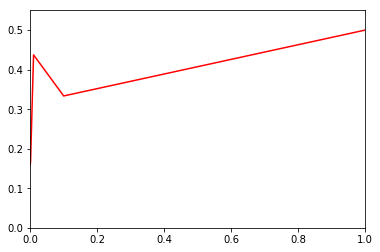

In [40]:

plt.plot(gamma_range,accuracy,'r')
plt.axis([0,1, 0, .55])
plt.show()

## now we try different train size for the optimal gamma

##  


In [41]:
acc=[]
for n in [1000,2000,3000,4000,4900]:
    trainpos=positive[:n];testpos=positive[n:]
    trainneg=negative[:n];testneg=negative[n:]
    labels=np.zeros([n]);ones=np.ones([n]);trainlabels = np.concatenate((labels,ones))
    testlabels=np.zeros([5000-n]);testones=np.ones([5000-n]);testlabels = np.concatenate((testlabels,testones))
    datapoints=np.concatenate((trainneg,trainpos))
    testcases=np.concatenate((testneg,testpos))
    clf = svm.SVC(kernel='rbf',gamma=gamma_range[-1])
    clf.fit(datapoints, trainlabels)  
    acc.append(1-clf.score(testcases,testlabels))

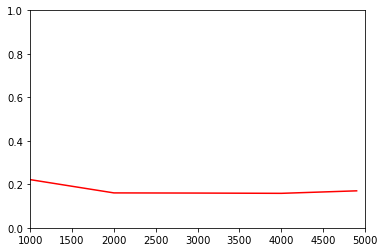

In [42]:
plt.plot([1000,2000,3000,4000,4900],acc,'r')
plt.axis([1000,5000, 0, 1])
plt.show()

In [43]:
n=4000
trainpos=positive[:n];testpos=positive[n:]
trainneg=negative[:n];testneg=negative[n:]
labels=np.zeros([n]);ones=np.ones([n]);trainlabels = np.concatenate((labels,ones))
testlabels=np.zeros([5000-n]);testones=np.ones([5000-n]);testlabels = np.concatenate((testlabels,testones))
datapoints=np.concatenate((trainneg,trainpos))
testcases=np.concatenate((testneg,testpos))

In [44]:
bayes = GaussianNB().fit(datapoints,trainlabels)
testerror=bayes.score(testcases,testlabels)

print (1-testerror)

0.159
